In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from sklearn import preprocessing
from pycaret.classification import *

Big-5 personality prediction

In [30]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,34.137687,57.4320,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,...,-0.988468,0.5,1.000000,0.951057,0.151428,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2e8e67b776a24055b564,33.794544,57.6810,94.303,15.8,80.0,0.833333,0.725,0.866667,-2.462709,...,-0.937752,0.5,0.623490,0.951057,0.347305,LOW,LOW,HIGH,HIGH,AVERAGE
2,621e2e8e67b776a24055b564,34.611011,57.4810,34.877,14.6,84.0,0.966667,0.725,0.866667,-2.385801,...,-0.848644,0.5,-0.222521,0.951057,0.528964,LOW,LOW,HIGH,HIGH,AVERAGE
3,621e2e8e67b776a24055b564,34.408304,57.4930,34.877,14.8,82.0,0.933333,0.725,0.833333,-2.124199,...,-0.724793,0.5,-0.900969,0.951057,0.688967,LOW,LOW,HIGH,HIGH,AVERAGE
4,621e2e8e67b776a24055b564,34.178922,56.7500,103.034,15.2,81.0,0.866667,0.725,0.866667,-2.396873,...,-0.571268,0.5,-0.900969,0.951057,0.820763,LOW,LOW,HIGH,HIGH,AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,621e339967b776a240e502de,33.816660,51.7600,47.281,11.6,79.0,0.700000,0.725,0.966667,-1.793898,...,0.485302,0.5,-0.900969,0.809017,-0.874347,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3451,621e339967b776a240e502de,34.460723,51.3510,45.883,12.0,79.0,0.766667,0.775,0.833333,-0.705708,...,0.299363,0.5,-0.900969,0.809017,-0.954139,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3452,621e339967b776a240e502de,34.137341,50.5040,49.779,12.0,78.0,0.833333,0.700,0.833333,-1.229213,...,0.101168,0.5,-0.222521,0.809017,-0.994869,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3453,621e339967b776a240e502de,34.406884,51.5330,45.322,11.6,73.0,0.700000,0.725,0.766667,-1.643875,...,-0.101168,0.5,0.623490,0.809017,-0.994869,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE


predict extraversion

In [31]:
data = data.drop(columns=['ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

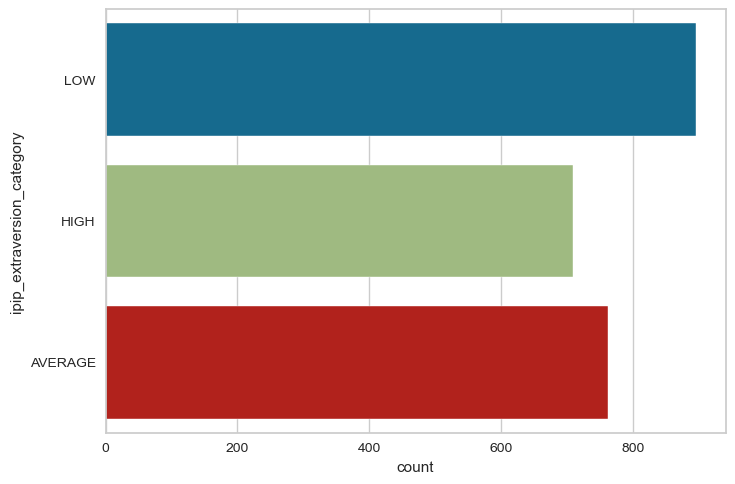

In [32]:
sns.countplot(y="ipip_extraversion_category", data=train_data)

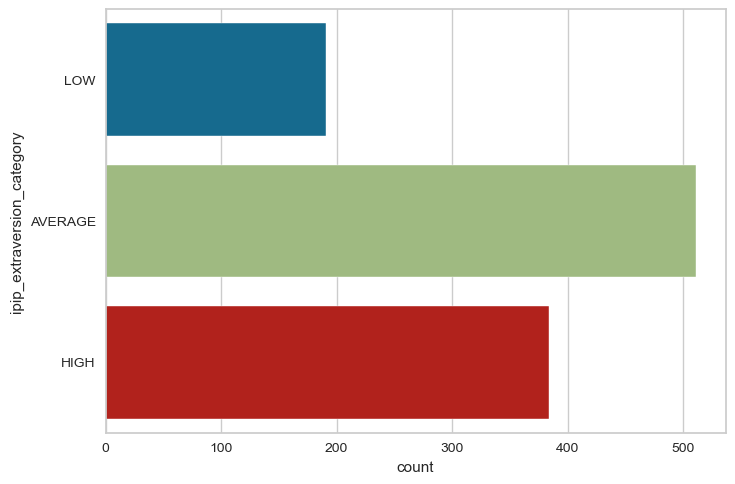

In [33]:
sns.countplot(y="ipip_extraversion_category", data=test_data)

In [34]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [35]:
s = setup(data=train_data, target='ipip_extraversion_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_extraversion_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 63)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3718,0.5300,0.3516,0.3907,0.3762,0.0433,0.0440,0.1300
gbc,Gradient Boosting Classifier,0.3691,0.5300,0.3887,0.3731,0.3476,0.0685,0.0753,1.5033
lightgbm,Light Gradient Boosting Machine,0.3603,0.5355,0.3523,0.3656,0.3426,0.0322,0.0354,0.5700
dt,Decision Tree Classifier,0.3303,0.4964,0.3391,0.3546,0.3260,-0.0073,-0.0063,0.0500
rf,Random Forest Classifier,0.3277,0.4729,0.3213,0.3490,0.3188,-0.0259,-0.0250,0.2067
dummy,Dummy Classifier,0.3206,0.5000,0.3333,0.1057,0.1582,0.0000,0.0000,0.0400
et,Extra Trees Classifier,0.2980,0.4155,0.3019,0.3318,0.3000,-0.0699,-0.0695,0.1733
ada,Ada Boost Classifier,0.2787,0.4631,0.3126,0.3340,0.2649,-0.0429,-0.0519,0.1767
qda,Quadratic Discriminant Analysis,0.2493,0.4173,0.2378,0.4112,0.2100,-0.1738,-0.2283,0.0600
ridge,Ridge Classifier,0.2355,0.0000,0.2305,0.2632,0.2424,-0.1536,-0.1566,0.0467


In [37]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
# plot_model(best, plot='feature')

predict agreeableness

In [39]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [40]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

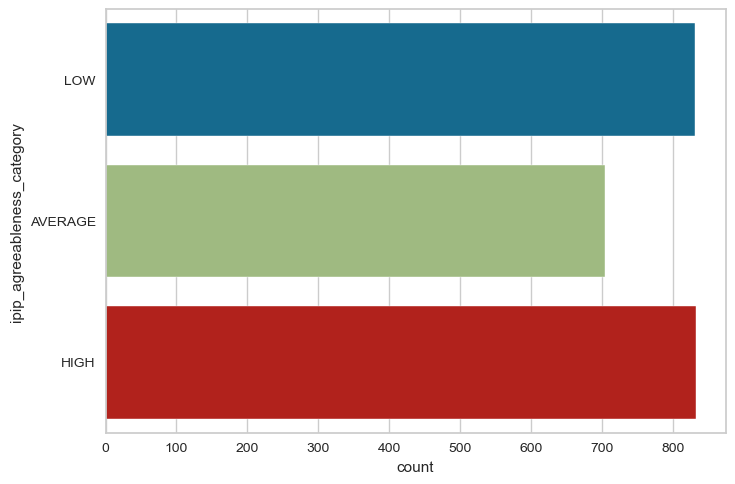

In [41]:
sns.countplot(y="ipip_agreeableness_category", data=train_data)

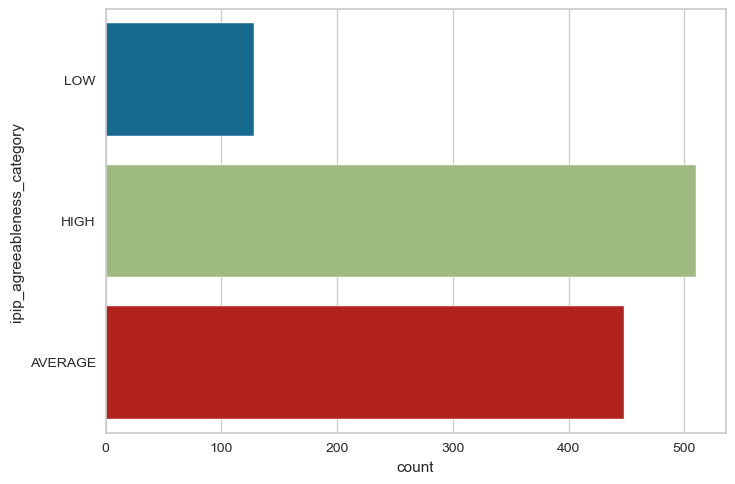

In [42]:
sns.countplot(y="ipip_agreeableness_category", data=test_data)

In [43]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [44]:
s = setup(data=train_data, target='ipip_agreeableness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 63)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3450,0.4961,0.3281,0.3666,0.3495,0.0054,0.0051,0.1467
dummy,Dummy Classifier,0.3007,0.5000,0.3333,0.1022,0.1502,0.0000,0.0000,0.0467
nb,Naive Bayes,0.2874,0.3755,0.2505,0.2935,0.2143,-0.1508,-0.1386,0.0400
qda,Quadratic Discriminant Analysis,0.2673,0.4395,0.2385,0.1965,0.2112,-0.1152,-0.1287,0.0600
ada,Ada Boost Classifier,0.2378,0.3644,0.2206,0.2365,0.2353,-0.1841,-0.1861,0.1700
lightgbm,Light Gradient Boosting Machine,0.2103,0.3865,0.2213,0.2417,0.2078,-0.1659,-0.1737,0.6133
rf,Random Forest Classifier,0.1986,0.3402,0.1941,0.2438,0.2041,-0.1917,-0.2026,0.2167
et,Extra Trees Classifier,0.1942,0.3278,0.1862,0.2656,0.2059,-0.1962,-0.2077,0.2033
ridge,Ridge Classifier,0.1856,0.0000,0.1770,0.2026,0.1846,-0.2290,-0.2399,0.0467
dt,Decision Tree Classifier,0.1846,0.3939,0.1825,0.2234,0.1932,-0.2000,-0.2139,0.0600


In [46]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
# plot_model(best, plot='feature')

predict conscientiousness

In [48]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [49]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

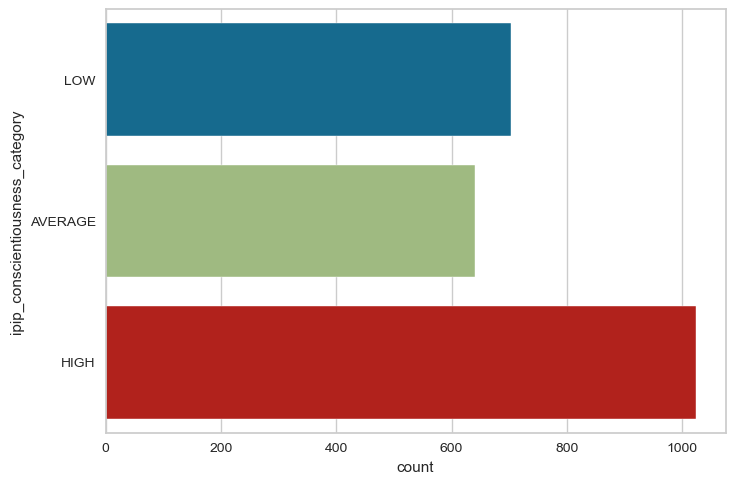

In [50]:
sns.countplot(y="ipip_conscientiousness_category", data=train_data)

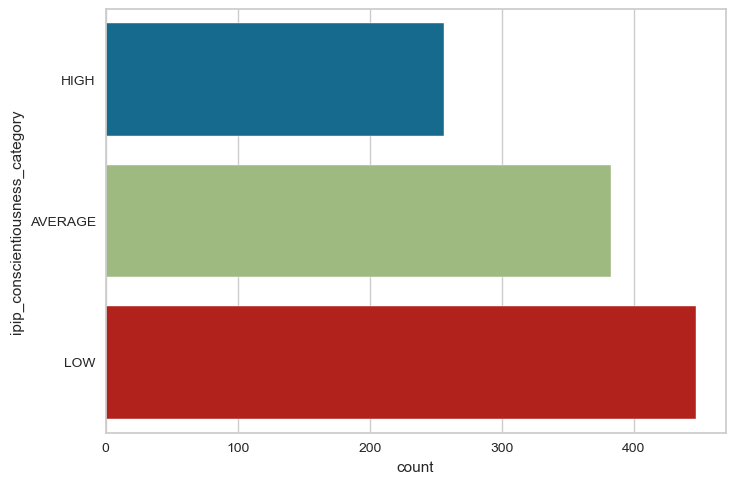

In [51]:
sns.countplot(y="ipip_conscientiousness_category", data=test_data)

In [52]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [53]:
s = setup(data=train_data, target='ipip_conscientiousness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_conscientiousness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 63)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [54]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.3621,0.5159,0.3444,0.3226,0.3133,0.0610,0.0699,0.0600
rf,Random Forest Classifier,0.3513,0.5120,0.3238,0.3083,0.3168,0.0074,0.0111,0.2300
knn,K Neighbors Classifier,0.3475,0.5336,0.3555,0.4135,0.3630,0.0454,0.0476,0.3300
lightgbm,Light Gradient Boosting Machine,0.3433,0.4891,0.3225,0.2988,0.3111,-0.0136,-0.0061,0.4667
et,Extra Trees Classifier,0.3418,0.4724,0.3167,0.2949,0.3069,-0.0046,-0.0046,0.1800
lda,Linear Discriminant Analysis,0.3299,0.5024,0.3032,0.3179,0.3060,0.0003,-0.0002,0.0467
gbc,Gradient Boosting Classifier,0.3297,0.5355,0.3101,0.3031,0.3045,-0.0128,-0.0062,1.7767
ridge,Ridge Classifier,0.3271,0.0000,0.2987,0.3200,0.3045,-0.0058,-0.0072,0.0400
ada,Ada Boost Classifier,0.3181,0.3894,0.3161,0.3245,0.2947,-0.0034,0.0032,0.1967
svm,SVM - Linear Kernel,0.3152,0.0000,0.2857,0.2894,0.2880,-0.0337,-0.0364,0.0533


In [55]:
best

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [56]:
# plot_model(best, plot='feature')

predict stability

In [57]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [58]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

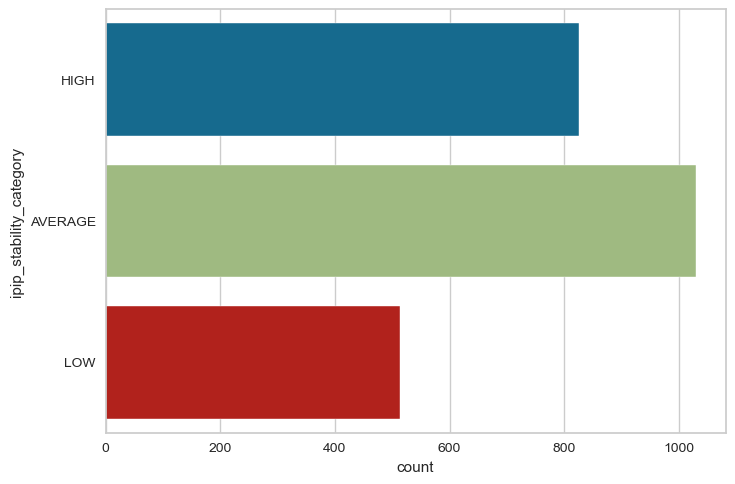

In [59]:
sns.countplot(y="ipip_stability_category", data=train_data)

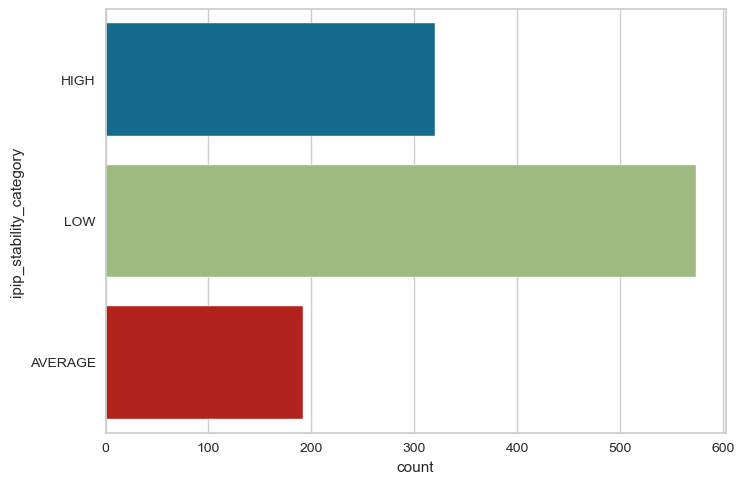

In [60]:
sns.countplot(y="ipip_stability_category", data=test_data)

In [61]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [62]:
s = setup(data=train_data, target='ipip_stability_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 63)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [63]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4338,0.5000,0.3333,0.1935,0.2662,0.0000,0.0000,0.0367
qda,Quadratic Discriminant Analysis,0.3145,0.4843,0.3103,0.4324,0.2323,-0.0388,-0.0255,0.0600
nb,Naive Bayes,0.2524,0.3759,0.2605,0.3014,0.2114,-0.0960,-0.1128,0.0433
knn,K Neighbors Classifier,0.2459,0.3800,0.2378,0.2636,0.2462,-0.1566,-0.1608,0.2800
ada,Ada Boost Classifier,0.2242,0.3725,0.2327,0.2739,0.2113,-0.1171,-0.1344,0.1867
lda,Linear Discriminant Analysis,0.2091,0.3342,0.2113,0.2424,0.2127,-0.1753,-0.1850,0.0400
svm,SVM - Linear Kernel,0.1988,0.0000,0.1866,0.2338,0.2015,-0.1938,-0.2132,0.0567
ridge,Ridge Classifier,0.1986,0.0000,0.2005,0.2276,0.2028,-0.1938,-0.2039,0.0400
dt,Decision Tree Classifier,0.1704,0.3873,0.1977,0.1648,0.1500,-0.2001,-0.2338,0.0500
lr,Logistic Regression,0.1688,0.3195,0.1533,0.2166,0.1765,-0.2380,-0.2557,0.6567


In [64]:
best

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [65]:
# plot_model(best, plot='feature')

predict intellect

In [66]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [67]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

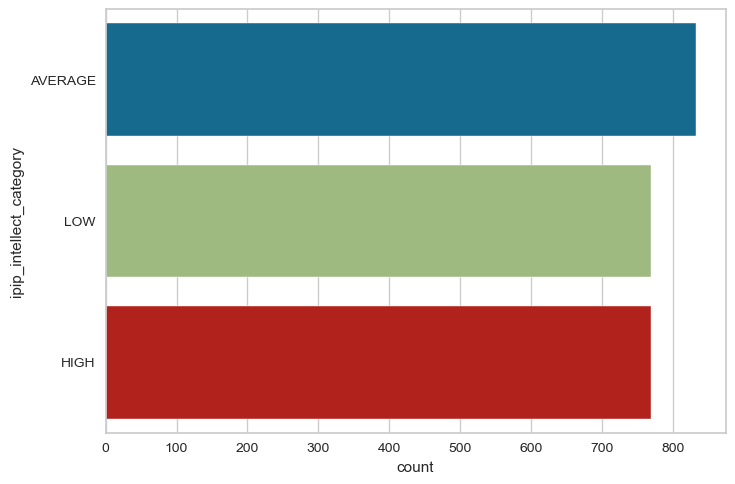

In [68]:
sns.countplot(y="ipip_intellect_category", data=train_data)

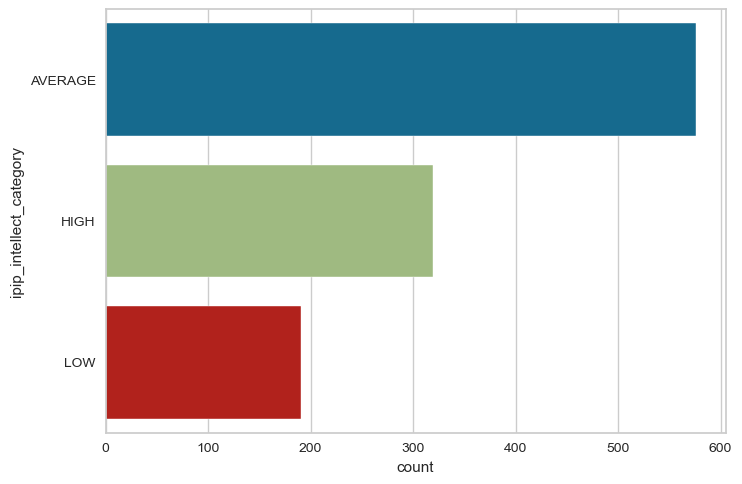

In [69]:
sns.countplot(y="ipip_intellect_category", data=test_data)

In [70]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [71]:
s = setup(data=train_data, target='ipip_intellect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 63)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [72]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3955,0.5831,0.3961,0.4210,0.3919,0.0835,0.0872,0.1767
nb,Naive Bayes,0.3614,0.5544,0.3342,0.3164,0.2969,-0.0070,-0.0012,0.0667
knn,K Neighbors Classifier,0.3565,0.5136,0.3400,0.3723,0.3513,0.0184,0.0201,0.2200
dummy,Dummy Classifier,0.3522,0.5000,0.3333,0.1266,0.1855,0.0000,0.0000,0.0333
lightgbm,Light Gradient Boosting Machine,0.3466,0.4886,0.3477,0.4047,0.3511,0.0384,0.0405,0.4533
gbc,Gradient Boosting Classifier,0.3451,0.5124,0.3316,0.3744,0.3466,0.0261,0.0251,1.5433
lda,Linear Discriminant Analysis,0.3325,0.5143,0.3093,0.3697,0.3449,-0.0061,-0.0069,0.0467
rf,Random Forest Classifier,0.3294,0.4878,0.3203,0.3813,0.3388,0.0063,0.0066,0.2333
ridge,Ridge Classifier,0.3273,0.0000,0.3086,0.3663,0.3400,-0.0111,-0.0117,0.0433
lr,Logistic Regression,0.3192,0.4928,0.3090,0.3690,0.3346,-0.0147,-0.0151,0.5367


In [73]:
best

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

In [74]:
# plot_model(best, plot='feature')

Stai stress category prediction

In [2]:
data = pd.read_pickle('data/fitbit_stai_processed.pkl')
data

,id,stai_stress,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,resting_hr,sleep_duration,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,stai_stress_category
0,621e2e8e67b776a24055b564,45.0,34.408304,57.481,94.3030,14.8,81.0,0.866667,0.725,0.866667,-2.385801,2332.08,62.47493,6653.1,71.725477,133.0,25.0,33.0,704.0,0.0,62.263999,33300000.0,485.0,70.0,0.0,94.0,1.116883,0.909091,1.110294,1.197531,9015.0,85.0,1282.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-7.071068e-01,0.000000,-1.133108e-15,2.079117e-01,-7.071068e-01,1.000000,1.000000,0.978148,Below average
1,621e2e8e67b776a24055b564,46.0,34.476865,56.570,34.5955,14.4,83.0,0.833333,0.775,0.800000,-1.912061,2262.88,62.06227,6215.8,69.309896,117.0,23.0,34.0,682.0,0.0,61.838534,35040000.0,503.0,85.0,0.0,96.0,1.028571,1.089744,1.090909,1.156250,8422.0,68.0,1365.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.000000e+00,0.000000,2.817326e-01,9.945219e-01,-1.836970e-16,1.000000,0.959493,0.104528,Average
2,621e2e8e67b776a24055b564,46.0,34.254286,57.330,100.3740,15.0,75.0,0.833333,0.700,0.766667,-2.154991,2412.09,63.70376,6527.0,70.665299,141.0,25.0,32.0,670.0,0.0,60.353677,32340000.0,463.0,76.0,0.0,94.0,1.026667,0.897727,0.969900,0.969697,8846.0,80.0,1343.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-7.071068e-01,0.000000,9.096320e-01,-7.431448e-01,7.071068e-01,1.000000,-0.415415,-0.669131,Average
3,621e2e8e67b776a24055b564,46.0,34.515655,59.798,98.5150,15.4,74.0,0.766667,0.725,0.700000,-1.972848,2497.79,63.07612,7537.8,71.781960,178.0,37.0,34.0,704.0,0.0,60.563807,33120000.0,474.0,78.0,0.0,93.0,1.012987,0.939759,1.071672,0.929293,10232.0,103.0,1307.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-7.071068e-01,0.000000,7.557496e-01,-7.431448e-01,7.071068e-01,1.000000,-0.654861,0.669131,Average
4,621e2e8e67b776a24055b564,54.0,34.418045,53.006,34.5955,15.6,76.0,0.766667,0.700,0.766667,-2.170245,2313.25,63.12848,6466.2,68.369958,137.0,26.0,29.0,694.0,0.0,57.802750,32580000.0,470.0,83.0,0.0,92.0,0.975000,0.976471,0.943333,0.957447,8762.0,72.0,1351.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.000000e+00,0.000000,9.096320e-01,-4.067366e-01,-1.836970e-16,1.000000,0.415415,0.913545,Above average
5,621e301e67b776a240608a72,51.0,34.051404,61.043,34.5955,14.4,77.5,0.766667,0.750,0.766667,-1.489268,2831.90,46.03536,5401.9,78.631023,44.0,0.0,0.0,1396.0,0.0,66.518459,27840000.0,404.0,53.0,0.0,95.0,0.985915,0.957738,0.979730,1.000000,7956.0,121.5,1159.0,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.449294e-16,-0.974928,-2.817326e-01,-4.067366e-01,1.000000e+00,-0.222521,-0.959493,0.913545,Above average
6,621e301e67b776a240608a72,55.0,34.911928,61.043,34.5955,14.4,79.0,0.633333,0.850,0.866667,-2.232929,1930.23,46.76992,4355.2,82.835024,160.0,23.0,17.0,1190.0,0.0,60.992309,26760000.0,390.0,60.0,0.0,97.0,0.820000,1.034483,0.940239,1.142857,6305.0,188.0,1083.0,22.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.673940e-16,0.000000,9.898214e-01,4.067366e-01,-1.000000e+00,1.000000,-0.14231

In [3]:
data = data.drop(columns=['stai_stress'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

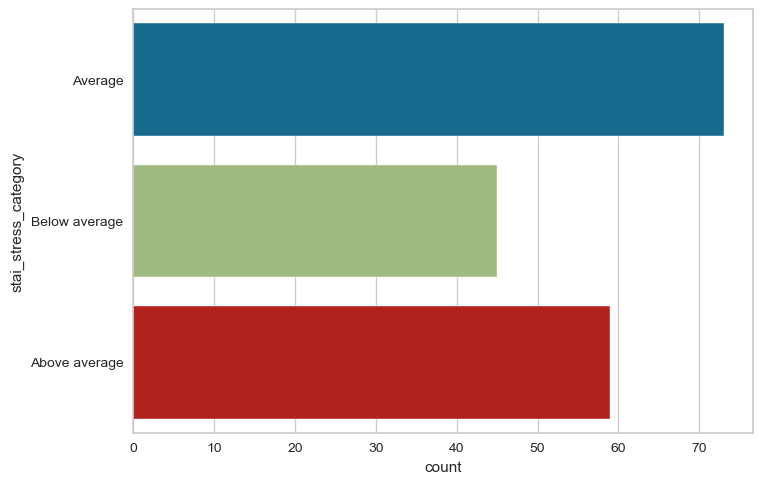

In [4]:
sns.countplot(y="stai_stress_category", data=train_data)

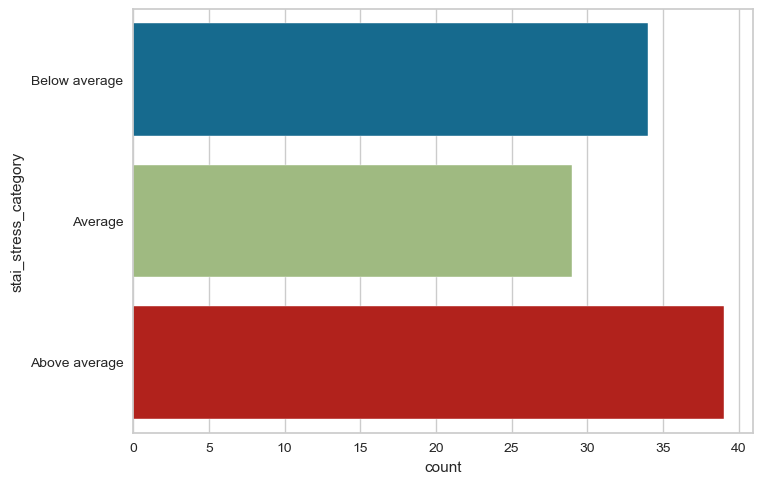

In [5]:
sns.countplot(y="stai_stress_category", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
s = setup(data=train_data, target='stai_stress_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,stai_stress_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(177, 62)"
5,Missing Values,False
6,Numeric Features,49
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.3785,0.4976,0.3454,0.3951,0.3749,0.0406,0.0457,0.2233
dt,Decision Tree Classifier,0.3672,0.5335,0.3596,0.4289,0.3754,0.0561,0.0597,0.0633
ada,Ada Boost Classifier,0.3672,0.5199,0.3378,0.3811,0.3594,0.0215,0.0234,0.1133
gbc,Gradient Boosting Classifier,0.3672,0.5093,0.3539,0.4130,0.3774,0.0573,0.0596,0.3667
et,Extra Trees Classifier,0.3672,0.5076,0.3273,0.3640,0.3420,0.0144,0.0195,0.2233
qda,Quadratic Discriminant Analysis,0.3446,0.5066,0.3349,0.2343,0.2165,0.0064,0.0010,0.0367
knn,K Neighbors Classifier,0.3333,0.5213,0.3372,0.4580,0.3385,0.0253,0.0279,1.1467
dummy,Dummy Classifier,0.3333,0.5000,0.3333,0.1162,0.1710,0.0000,0.0000,0.0233
ridge,Ridge Classifier,0.3107,0.0000,0.2925,0.3449,0.3192,-0.0384,-0.0396,0.0633
lightgbm,Light Gradient Boosting Machine,0.3107,0.4732,0.2882,0.3313,0.3089,-0.0529,-0.0541,0.5300


In [9]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

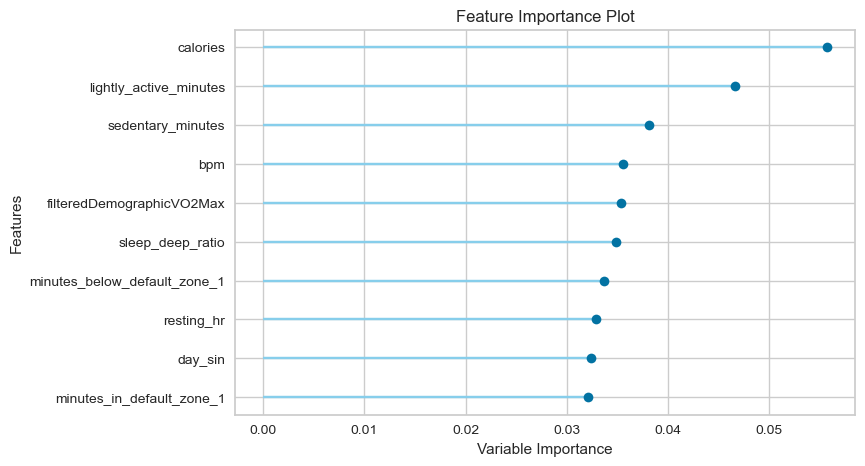

In [10]:
plot_model(best, plot='feature')

Panas negative affect category prediction

In [11]:
data = pd.read_pickle('data/fitbit_panas_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,negative_affect_category
0,621e2e8e67b776a24055b564,34.515655,59.798,98.515,15.4,74.0,0.766667,0.725,0.700000,-1.972848,...,0.0,-7.071068e-01,0.000000,7.557496e-01,-0.743145,7.071068e-01,1.000000,-0.654861,0.669131,Below average
1,621e2e8e67b776a24055b564,34.408304,57.481,94.303,14.8,81.0,0.866667,0.725,0.866667,-2.385801,...,0.0,-7.071068e-01,0.000000,-1.133108e-15,0.207912,-7.071068e-01,1.000000,1.000000,0.978148,Below average
2,621e2e8e67b776a24055b564,34.476865,56.570,35.123,14.4,83.0,0.833333,0.775,0.800000,-1.912061,...,0.0,-1.000000e+00,0.000000,2.817326e-01,0.994522,-1.836970e-16,1.000000,0.959493,0.104528,Below average
3,621e2e8e67b776a24055b564,34.418045,53.006,35.123,15.6,76.0,0.766667,0.700,0.766667,-2.170245,...,0.0,-1.000000e+00,0.000000,9.096320e-01,-0.406737,-1.836970e-16,1.000000,0.415415,0.913545,Below average
4,621e2e8e67b776a24055b564,34.254286,57.330,100.374,15.0,75.0,0.833333,0.700,0.766667,-2.154991,...,0.0,-7.071068e-01,0.000000,9.096320e-01,-0.743145,7.071068e-01,1.000000,-0.415415,-0.669131,Below average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,621e339967b776a240e502de,34.876472,50.683,47.293,11.6,82.0,0.766667,0.875,0.866667,-1.986618,...,0.0,3.673940e-16,0.000000,9.096320e-01,-0.866025,-1.000000e+00,1.000000,-0.415415,-0.500000,Below average
264,621e339967b776a240e502de,35.107574,54.325,47.929,12.2,87.0,0.866667,0.950,0.766667,-1.998401,...,0.0,3.673940e-16,0.000000,7.557496e-01,-0.587785,-1.000000e+00,1.000000,-0.654861,0.809017,Below average
265,621e339967b776a240e502de,34.957428,52.810,47.801,12.4,81.0,0.700000,0.900,0.866667,-2.028679,...,0.0,7.071068e-01,0.000000,2.817326e-01,0.587785,7.071068e-01,1.000000,0.959493,0.809017,Below average
266,621e339967b776a240e502de,34.073346,51.364,51.324,12.2,84.0,0.833333,0.875,0.866667,-2.023243,...,0.0,7.071068e-01,0.974928,5.406408e-01,0.587785,7.071068e-01,-0.222521,0.841254,-0.809017,Below average


In [12]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [13]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [14]:
s = setup(data=train_data, target='negative_affect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,negative_affect_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(166, 62)"
5,Missing Values,False
6,Numeric Features,48
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.3735,0.5252,0.3413,0.3535,0.3526,0.0079,0.0103,0.0133
knn,K Neighbors Classifier,0.3193,0.4562,0.3235,0.3486,0.3053,-0.0218,-0.0205,0.0400
et,Extra Trees Classifier,0.3193,0.4602,0.3453,0.3440,0.3034,-0.0055,-0.0060,0.1600
dummy,Dummy Classifier,0.3192,0.5000,0.3333,0.1056,0.1578,0.0000,0.0000,0.0233
lda,Linear Discriminant Analysis,0.3133,0.5058,0.3323,0.3730,0.3101,0.0035,0.0056,0.0300
ridge,Ridge Classifier,0.3073,0.0000,0.3310,0.3658,0.3005,0.0007,0.0016,0.0167
qda,Quadratic Discriminant Analysis,0.2955,0.5000,0.3333,0.0928,0.1396,0.0000,0.0000,0.0300
svm,SVM - Linear Kernel,0.2951,0.0000,0.3083,0.3092,0.2777,-0.0230,-0.0257,0.0167
lr,Logistic Regression,0.2950,0.4856,0.3353,0.3104,0.2694,-0.0142,-0.0145,0.0600
dt,Decision Tree Classifier,0.2895,0.4691,0.3026,0.3180,0.2886,-0.0546,-0.0575,0.0133


In [16]:
best

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
plot_model(best, plot='feature')